# Ed is having huge issues with running this code while submission. Hence, incase of an issue, please check our collab link :
 
https://colab.research.google.com/drive/1zOkUdRKoxEW_TEZEQq-4rgqv76xGdaZN?usp=sharing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#converting csv file into pandas data frame
df=pd.read_csv('https://raw.githubusercontent.com/Saraman04/fifa20/main/data/players_19.csv')
df_20=pd.read_csv('https://raw.githubusercontent.com/Saraman04/fifa20/main/data/players_20.csv')


In [3]:
#looking into data set
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [4]:
#Information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(11), object(77)
memory usage: 14.1+ MB


In [5]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
count,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,1.777000e+04,17770.000000,17770.000000,17770.000000,...,15784.000000,15784.000000,15784.000000,15784.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,213797.776308,25.193922,181.253292,75.310917,66.240405,71.382949,2.440756e+06,9956.162071,1.117783,2.946427,...,57.082172,62.267169,51.665484,64.972567,65.374622,62.931017,61.511078,66.149043,38.675730,63.088117
std,29955.746535,4.651957,6.745892,7.080013,6.994104,6.145171,5.644779e+06,22330.640048,0.401085,0.659353,...,10.589207,10.442659,16.347564,9.745859,7.807033,7.556389,7.667533,8.234898,10.420846,8.664458
min,164.000000,16.000000,154.000000,50.000000,47.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,...,24.000000,23.000000,15.000000,30.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000
25%,199803.000000,21.000000,176.000000,70.000000,62.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,...,50.000000,57.000000,37.000000,59.000000,60.000000,58.000000,56.000000,60.000000,30.000000,57.000000
50%,221350.500000,25.000000,181.000000,75.000000,66.000000,71.000000,6.750000e+05,3000.000000,1.000000,3.000000,...,58.000000,64.000000,56.000000,66.000000,65.000000,63.000000,61.000000,66.000000,40.000000,63.000000
75%,235967.750000,28.000000,186.000000,80.000000,71.000000,75.000000,2.000000e+06,9000.000000,1.000000,3.000000,...,64.000000,69.000000,65.000000,72.000000,71.000000,68.000000,66.000000,72.000000,46.000000,69.000000
max,246063.000000,45.000000,205.000000,110.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,91.000000,89.000000,91.000000,92.000000,91.000000,94.000000,65.000000,90.000000


In [6]:
#reading columns to a list
cols=df.columns.to_list()
cols

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

selecting columns that are useful,Picking up columns that matter ie skills and body type. leaving the data leakage columns such as scoring in the specific player positions.

In [7]:
use_cols=['age','height_cm','weight_kg','preferred_foot','pace','shooting','passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
'gk_reflexes','gk_speed','gk_positioning','attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'goalkeeping_diving',
'goalkeeping_handling',
'goalkeeping_kicking',
'goalkeeping_positioning',
'goalkeeping_reflexes']
 

In [8]:
#preprocessing string variable into categorical numerical
df.loc[df['preferred_foot'] == 'Left', 'preferred_foot'] = 1
df.loc[df['preferred_foot'] == 'Right', 'preferred_foot'] = 0
#test set
df_20.loc[df_20['preferred_foot'] == 'Left', 'preferred_foot'] = 1
df_20.loc[df_20['preferred_foot'] == 'Right', 'preferred_foot'] = 0

Pre-processing the player positions for easier classification

In [9]:
def combine_positions(row):
    # There are 15 different positions
    positions = row['player_positions'].split(', ') 
    N = len(positions)
    if N < 3:
        # If a player has two positions the first one will be considered as their
        # position, of course, players with only one position won't be affected
        position = positions[0]
        if position in ['ST', 'LW', 'RW','CF']: #4
            return 0 #ATTACKER
        elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
            return 1 #MIDFIELDER
        elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
            return 2 #DEFENDER
        elif position in ['GK']: #1
            return 3 #GOALKEEPER
    else: # If player has three possible positions
        position_count = [0, 0, 0, 0] 
        for position in positions:
            if position in ['ST', 'LW', 'RW','CF']: #4
                index = 0 #ATTACKER
            elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
                index = 1 #MIDFIELDER
            elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
                index = 2 #DEFENDER
            elif position in ['GK']: #1
                index = 3 #GOALKEEPER
            else:
                continue 
            position_count[index] += 1 
        # This will count which was the most repeated position and assign it
        # to the player
        return position_count.index(max(position_count))

df['player_positions'] = df.apply(combine_positions, axis=1)#for train
df_20['player_positions'] = df_20.apply(combine_positions, axis=1)

In [10]:
df.loc[df['player_positions'] == 0, 'player_positions'] = 'Attacker'
df.loc[df['player_positions'] == 1, 'player_positions'] = 'Midfielder'
df.loc[df['player_positions'] == 2, 'player_positions'] = 'defender'
df.loc[df['player_positions'] == 3, 'player_positions'] = 'goal_keeper'
#for test set
df_20.loc[df_20['player_positions'] == 0, 'player_positions'] = 'Attacker'
df_20.loc[df_20['player_positions'] == 1, 'player_positions'] = 'Midfielder'
df_20.loc[df_20['player_positions'] == 2, 'player_positions'] = 'defender'
df_20.loc[df_20['player_positions'] == 3, 'player_positions'] = 'goal_keeper'

In [11]:
df['player_positions']

0           Attacker
1           Attacker
2           Attacker
3        goal_keeper
4         Midfielder
            ...     
17765     Midfielder
17766       Attacker
17767     Midfielder
17768       defender
17769     Midfielder
Name: player_positions, Length: 17770, dtype: object

filling zero for skilll values that are unavailable since some skills are exclusive to some positions. Filling with zero makes sense because the skill is not present with the player.

In [12]:
#for train set
for col in use_cols:
  imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
  imp_constant.fit(df[col].values.reshape(1,-1))
  SimpleImputer()
  
  X = df[col].values.reshape(1,-1)
  col_new=imp_constant.fit_transform(X)
  df[col]=col_new.reshape(len(col_new[0]),)

# for test set

for col in use_cols:
  imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
  imp_constant.fit(df_20[col].values.reshape(1,-1))
  SimpleImputer()
  
  X = df_20[col].values.reshape(1,-1)
  col_new=imp_constant.fit_transform(X)
  df_20[col]=col_new.reshape(len(col_new[0]),)
  


Some values in the columns we want to select are in the form of mathematical expression to convert them into string

In [13]:
new_df=df[use_cols]
new_df_20=df_20[use_cols]
def try_eval(x):
    """Converts to float64 else returns as it is"""
    try:
        return eval(x)
    except:
        return x

#train set
new_df=new_df.applymap(try_eval)
#test set
new_df_20=new_df_20.applymap(try_eval)

In [14]:
#preparing new_df to use as predictor matrix

X = new_df
y = df.player_positions



KNN classification

In [15]:
knn_dict_test={}
knn_dict_train={}
for k_value in range(1,50):

    # Split the data to 80-20
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y)

    # KNN Classifier
    model = KNeighborsClassifier(n_neighbors=k_value)
    
    # Fit the model on the train data
    model.fit(X_train,y_train)
    
    # Use the trained model to predict on the test data
    y_pred_test = model.predict(X_test)
    y_pred_train=model.predict(X_train)

    # Calculate the accuracy of the test data predictions
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    # Store the accuracy values of each k value in the dictionary
    knn_dict_test[k_value] = accuracy_test
    knn_dict_train[k_value] = accuracy_train


In [63]:
#sorting knn_dictionary to get best K value
accuracy_test=list(knn_dict_test.values())
df_y_graph=pd.DataFrame(accuracy_test)
df_y_graph.columns=['accuracy']
best_k = df_y_graph.sort_values(by='accuracy',ascending=False)
best_k=best_k.index
best_k[:10]

Int64Index([37, 48, 42, 29, 34, 36, 30, 28, 25, 13], dtype='int64')

In [64]:
#Since cross validating all k-values is computationally expensive we selected first 10 best ones from KNN

In [68]:
best_KNN=best_k[:10]

In [12]:


accuracy_train=list(knn_dict_train.values())

# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots(figsize=(16,8))

# Plot the validation error with labels
ax.plot(range(1,50), accuracy_test, label = 'Validation error', linewidth=3, color='#FF7E79', alpha=0.4)

 #Plot the training error with labels
ax.plot(range(1,50), accuracy_train, label = 'Training error', linewidth=3, color="#007D66", alpha=0.4)

# Plot the training error with labels
#ax[1].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the cross-validation error with labels
#ax[1].plot(range(maxdeg), np.log(cross_validation_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Set the plot labels and legends
ax.set_xlabel('K_value', fontsize=12)
ax.set_ylabel('Accuracy score', fontsize=12)
ax.set_title("Accuracy score with respect to k_value")



ax.legend()





NameError: name 'knn_dict_train' is not defined

Calculating cross validation score for top 10 KNN K- Value

In [67]:

cross_validation_accuracy=[]
for k_value in best_KNN :
    
    model = KNeighborsClassifier(n_neighbors=k_value+1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y)
    accuracy = cross_validate(model,X,y,scoring="accuracy",cv=5,return_train_score=False)
    accuracy_mean=np.mean(abs(accuracy['test_score']))
    # Compute the mean of the cross validation error and store in list 
 
    cross_validation_accuracy.append(accuracy_mean)

    




In [70]:
cross_validation_accuracy

[0.8642656162070906,
 0.8652222847495779,
 0.8652222847495779,
 0.8654473832301631,
 0.8648846370287,
 0.8647720877884074,
 0.865616207090602,
 0.8653348339898705,
 0.8651660101294316,
 0.8613956105796288]

In [71]:
best_KNN_cv=best_KNN[cross_validation_accuracy.index(max(cross_validation_accuracy))]+1

Best KNN from KNN and from cross validation is varying for each iteration

cross validation and validation best K-value has nt changed but cross validation gave a better estimate of accuracy because test set accuracy was 2 points more in normal knn rather in cross validation for k=43 which could be because of data specific result. Still since the data is big enough, the best k values didnt change much for validation and cross validation.

In [72]:
print(f"Model: Best KNN Classification {best_KNN_cv}:")

print(f"Test  Accuracy using cross validation {max(cross_validation_accuracy)*100:.2f} %")

Model: Best KNN Classification 31:
Test  Accuracy using cross validation 86.56 %


In [13]:
#Logistic Regression


log_reg = LogisticRegressionCV(n_jobs=-1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y)
log_reg.fit(X_train, y_train)
y_test_pred_lr = log_reg.predict(X_test)
y_train_pred_lr = log_reg.predict(X_train)

#return_accuracy --> Returns accuracy score, When y_pred has more than one correct answer
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)

print("Model: Logistic Regression")
print(f"Train Accuracy {train_accuracy_lr*100:.2f} %")
print(f"Test  Accuracy {test_accuracy_lr*100:.2f} %")

/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

Model: Logistic Regression
Train Accuracy 88.77 %
Test  Accuracy 88.72 %


Over the iterations while comparing logistic regression and KNN there is a little bit of difference and many times logistic regression is giving accuracy of 1 point more than KNN

Test set according to the problem statement

In [14]:
#Predictor Matrix from 2020 data set and selected clubs

df_test=new_df_20.loc[df_20['club'].isin(['FC Barcelona','FC Bayern München','Real Madrid','Paris Saint-Germain','Juventus','Atlético Madrid','Manchester City','Liverpool','Manchester United'])]

# response variable from 2020 data set and selected clubs
df_test_y=df_20.loc[df_20['club'].isin(['FC Barcelona','FC Bayern München','Real Madrid','Paris Saint-Germain','Juventus','Atlético Madrid','Manchester City','Liverpool','Manchester United'])].player_positions

In [81]:
df_test_y.shape

(287,)

In [22]:
X_test_club = df_test
y_test_club = df_test_y

Implementing Best KNN on test data from 2020 data set

In [16]:
#training whole 2019 data on KNN best K_value and testing on 2020 test set 
model = KNeighborsClassifier(n_neighbors=best_KNN_cv)

model.fit(X,y)
y_pred_test_club=model.predict(X_test_club)
test_accuracy = accuracy_score(y_test_club, y_pred_test_club)

print(f"Model: Best KNN Classificationwith K_value {best_KNN_cv}")

print(f"Test  Accuracy {test_accuracy*100:.2f} %")

NameError: name 'best_KNN_cv' is not defined

Implementing Logistic Regression on 2020 Test data set

In [16]:
#training whole 2019 data on KNN best K_value and testing on 2020 test set 
log_reg = LogisticRegressionCV(n_jobs=-1)
log_reg.fit(X, y)
y_test_pred_lr = log_reg.predict(X_test_club)


#Returns accuracy score, When y_pred has more than one correct answer
test_accuracy_lr = accuracy_score(y_test_club, y_test_pred_lr)


/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_

In [86]:
print(f"Test  Accuracy {test_accuracy_lr*100:.2f} %")

Test  Accuracy 87.11 %


Some times logistic gives better accuracy and sometimes KNN gives better accuracy

Player positions predicted by logistic regression

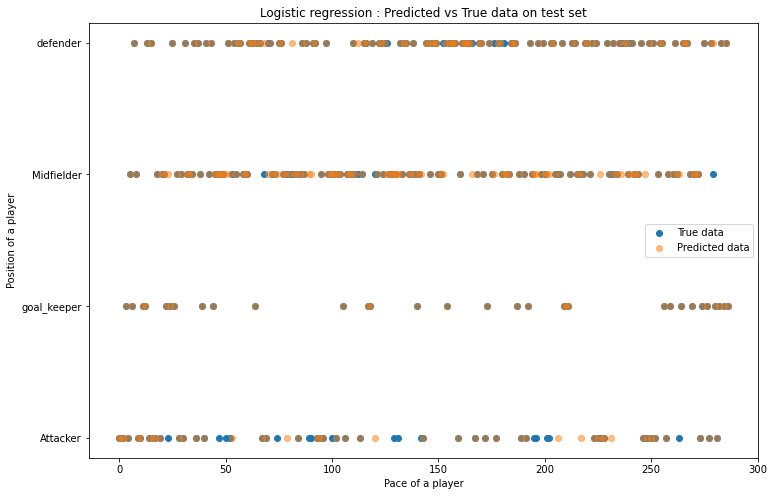

In [29]:


#Make a scatter plot

plt.figure(figsize=(12,8))
plt.scatter(range(len(y_test_pred_lr)),y_test_club, label = 'True data')
plt.scatter(range(len(y_test_pred_lr)),y_test_pred_lr , label = 'Predicted data',alpha = 0.5)

plt.title('Logistic regression : Predicted vs True data on test set')
plt.xlabel('List of players')
plt.ylabel('Position of a player')
plt.legend()
plt.show()

Player positions predicted by KNN

In [30]:


#Make a scatter plot

plt.figure(figsize=(12,8))
plt.scatter(range(len(y_pred_test_club)),y_pred_test_club, label = 'True data')
plt.scatter(range(len(y_pred_test_club)),y_pred_test_club , label = 'Predicted data',alpha = 0.5)

plt.title('Logistic regression : Predicted vs True data on test set')
plt.xlabel('List of players')
plt.ylabel('Position of a player')
plt.legend()
plt.show()

<Figure size 864x576 with 0 Axes>

NameError: name 'y_pred_test_club' is not defined